# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Ahmad Taufiq Ramadhan
- **Email:** ahmadtaufiq2710@gmail.com
- **ID Dicoding:** ahmadtrmd

## Menentukan Pertanyaan Bisnis





- Pertanyaan 1
Kapan hari penyewaan sepeda tertinggi dan terendah ?
- Pertanyaan 2
Berapa perbandingan registered user dengan casual user
- Pertanyaan 3
Bagaimana hubungan tingkat kelembapan udara dapat mempengaruhi tingkat penyewaan sepeda

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
#Menampilkan data hari
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
#Menampilkan data jam
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [ ]:
#Melihat info setiap kolom dari data Hari
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
#Melihat info setiap kolom dari data Jam
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
#Cek duplikasi dan memeriksa parameter statistik
print("duplikasi: ", day_df.duplicated().sum())
day_df.describe()

duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
print("duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [ ]:
#Mengganti tipe data tanggal
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])
  day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
datetime_columns_hour = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])
  hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Cleaning data yang dilakukan hanya dengan memgganti tipe data pada kolom tanggal dan tidak terdapat missing value dan data duplikat sehingga tidak memerlukan drop data ataupun mengganti data.

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
day_df.describe(include='all')

<ipython-input-13-a3f85d0fb009>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include='all')


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [ ]:
hour_df.describe(include='all')

<ipython-input-14-8c27de8cc91c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include='all')


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [ ]:
day_analisis = day_df.groupby(by="weekday").agg({
    "cnt": "sum"
})

#Mengurutkan tingkat penyewaan  berdasarkan hari
sorted_day_data = day_analisis.sort_values(by ="cnt", ascending=False)
print(sorted_day_data)

            cnt
weekday        
5        487790
4        485395
6        477807
3        473048
2        469109
1        455503
0        444027


In [ ]:
#Menghitung total casual dan registed
total_casual = hour_df["casual"].sum()
total_registered = hour_df["registered"].sum()

#Menghitung total penyewa
total_users = total_casual + total_registered

# Menghitung persentase casual dan registered
percent_casual = (total_casual / total_users) * 100
percent_registered = (total_registered / total_users) * 100

# Menampilkan hasil
print(f"Total casual users: {total_casual} ({percent_casual:.2f}%)")
print(f"Total registered users: {total_registered} ({percent_registered:.2f}%)")

Total casual users: 620017 (18.83%)
Total registered users: 2672662 (81.17%)


In [ ]:
humidity_analisis = hour_df.groupby(by="hum").agg({
    "cnt": "sum"
})

#mengurutkan tingkat penyewaan sepeda berdasarkan kelembapan udara
sorted_hum_data = humidity_analisis.sort_values(by ="cnt", ascending=False)
print(sorted_hum_data)

        cnt
hum        
0.83  93265
0.55  86206
0.46  79253
0.66  76920
0.62  76125
...     ...
0.08     77
0.97     64
0.14     38
0.12     29
0.13     17

[89 rows x 1 columns]


In [ ]:
#Menggabungkan kedua data
all_data = pd.merge(left=day_df, right=hour_df, how="left", left_on='dteday', right_on='dteday')
all_data.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Visualization & Explanatory Analysis

### Pertanyaan 1:
Kapan hari penyewaan sepeda tertinggi dan terendah ?

In [ ]:
day_analisis = day_df.groupby(by="weekday").agg({
    "cnt": "sum"
})

#Mengurutkan tingkat penyewaan  berdasarkan hari
sorted_day_data = day_analisis.sort_values(by ="cnt", ascending=False)
print(sorted_day_data)

            cnt
weekday        
5        487790
4        485395
6        477807
3        473048
2        469109
1        455503
0        444027


0 : Minggu, 1 : Senin, 2 = Selasa, 3 = Rabu, 4 = Kamis, 5 = Jumat, 6 = Sabtu


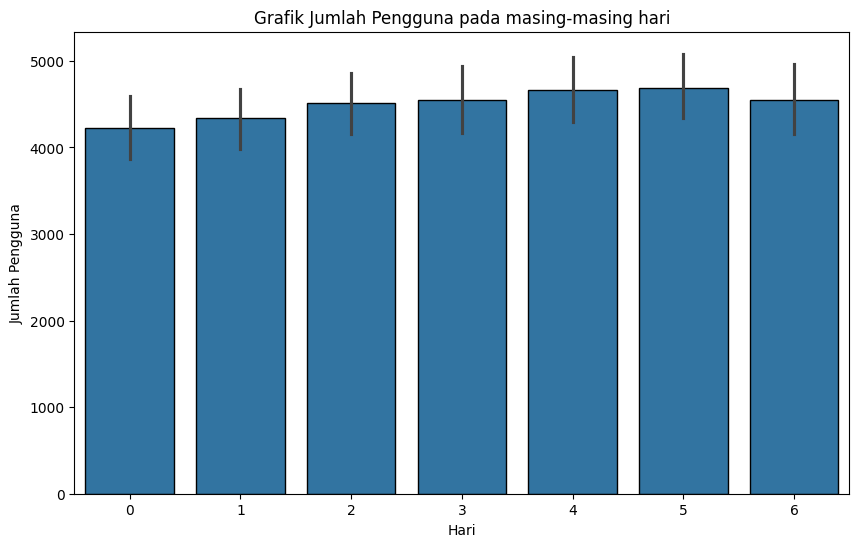

In [ ]:
print('0 : Minggu, 1 : Senin, 2 = Selasa, 3 = Rabu, 4 = Kamis, 5 = Jumat, 6 = Sabtu')
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='cnt', data=day_df, edgecolor='black')
plt.xlabel('Hari')
plt.ylabel('Jumlah Pengguna')
plt.title('Grafik Jumlah Pengguna pada masing-masing hari')
plt.show()

Dari grafik diatas dapat dilihat tingkat penyewaan tertinggi pada hari Jumat dan terendah pada hari minggu.

### Pertanyaan 2:
Berapa perbandingan registered user dengan casual user


In [ ]:
#Menghitung total casual dan registed
total_casual = hour_df["casual"].sum()
total_registered = hour_df["registered"].sum()

#Menghitung total penyewa
total_users = total_casual + total_registered

# Menghitung persentase casual dan registered
percent_casual = (total_casual / total_users) * 100
percent_registered = (total_registered / total_users) * 100

# Menampilkan hasil
print(f"Total casual users: {total_casual} ({percent_casual:.2f}%)")
print(f"Total registered users: {total_registered} ({percent_registered:.2f}%)")

Total casual users: 620017 (18.83%)
Total registered users: 2672662 (81.17%)


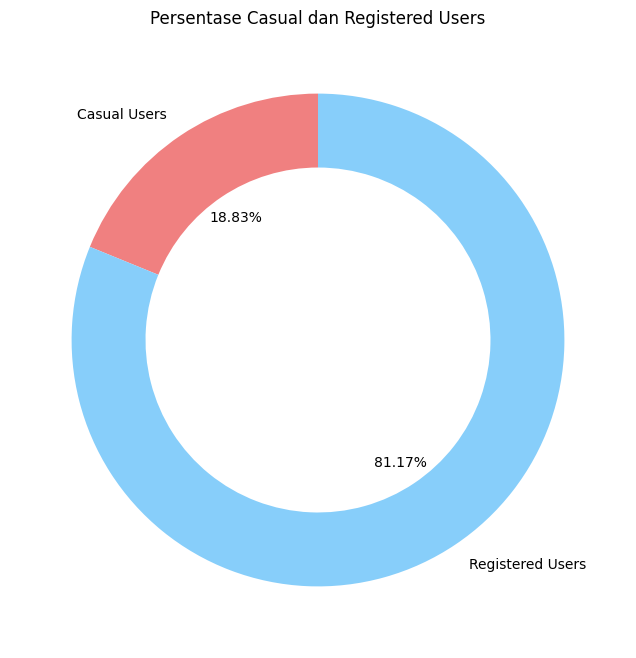

In [ ]:
# Data untuk pie chart
labels = ['Casual Users', 'Registered Users']
sizes = [total_casual, total_registered]
colors = ['lightcoral', 'lightskyblue']

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', colors=colors, startangle=90, wedgeprops=dict(width=0.3))


# Menambahkan keterangan
plt.title('Persentase Casual dan Registered Users')
plt.show()

Dari diagram lingkaran diatas dapat dilihat perbadingan dan persentase antara casual user dan registered user

### Pertanyaan 3:
Bagaimana hubungan tingkat kelembapan udara dapat mempengaruhi tingkat penyewaan sepeda


In [ ]:
# Membagi data berdasarkan rentang kelembapan (hum)
bins = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
labels = [f"{i:.2f}-{i+0.10:.2f}" for i in bins[:-1]]

# Menambahkan kolom baru dengan label rentang kelembapan
sorted_hum_data["humidity_range"] = pd.cut(sorted_hum_data.index, bins=bins, labels=labels)

# Menghitung total penyewaan sepeda dalam setiap rentang kelembapan
rentang_summary = sorted_hum_data.groupby("humidity_range")["cnt"].sum()

# Menampilkan hasil
print(rentang_summary)


humidity_range
0.10-0.20     20658
0.20-0.30    201926
0.30-0.40    484917
0.40-0.50    626500
0.50-0.60    593323
0.60-0.70    546519
0.70-0.80    392484
0.80-0.90    331693
0.90-1.00     93852
Name: cnt, dtype: int64


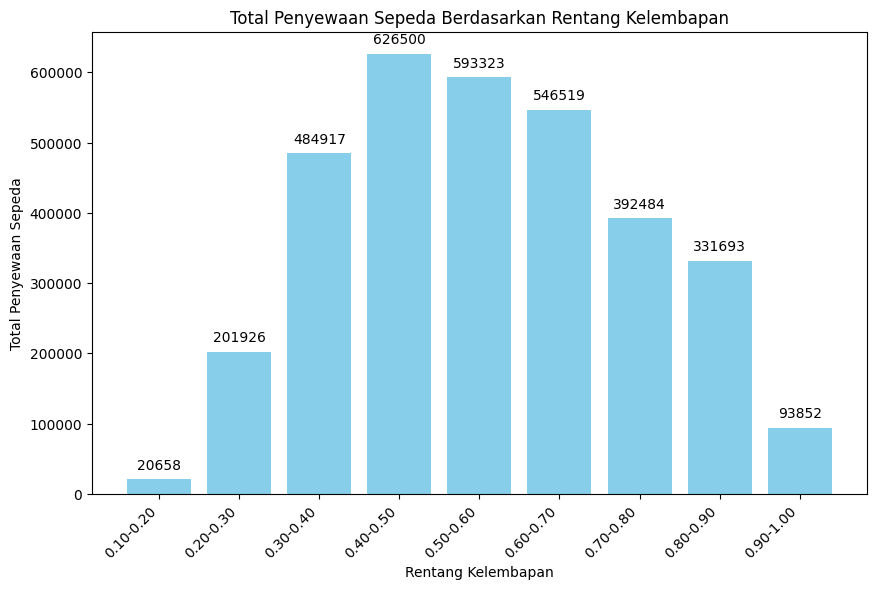

In [ ]:
# Data dari hasil perhitungan
humidity_ranges = rentang_summary.index
total_counts = rentang_summary.values

# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.bar(humidity_ranges, total_counts, color='skyblue')
plt.xlabel('Rentang Kelembapan')
plt.ylabel('Total Penyewaan Sepeda')
plt.title('Total Penyewaan Sepeda Berdasarkan Rentang Kelembapan')
plt.xticks(rotation=45, ha='right')

# Menambahkan label nilai di atas setiap bar
for i, value in enumerate(total_counts):
    plt.text(i, value + 10000, str(value), ha='center', va='bottom')

plt.show()

Dari diagram batang diatas dapat dilihat bahwa tingkat pennyewaan paling tinggi terdapat di antara 40%-50% dan di ikuti rentang 50%-60% dan 60%-70% dimana rentang tersebut adalah tingkat kelembapan yang cukup baik yaitu 45%-65%

##Analisis RFM

In [ ]:
# Menghitung data kebaruan ('recency') berdasarkan tanggal terbaru untuk setiap grup 'instant_x'
recency_data = all_data.groupby('instant_x')['dteday'].max().reset_index()
recency_data['recency'] = (pd.Timestamp('2024-03-02') - pd.to_datetime(recency_data['dteday'])).dt.days
hasil_recency = recency_data[['instant_x', 'recency']]

# Menghitung frekuensi ('frequency') untuk setiap grup 'instant_x'
hasil_frequency = all_data.groupby('instant_x').size().reset_index(name='frequency')

# Menghitung nilai moneter ('monetary') dengan menjumlahkan 'cnt_y' untuk setiap grup 'instant_x'
monetary_data = all_data.groupby('instant_x')['cnt_y'].sum().reset_index().rename(columns={'cnt_y': 'monetary'})
hasil_monetary = monetary_data[['instant_x', 'monetary']]

# Menampilkan hasil perhitungan kebaruan, frekuensi, dan nilai moneter
print(hasil_recency)
print(hasil_frequency)
print(hasil_monetary)


     instant_x  recency
0            1     4809
1            2     4808
2            3     4807
3            4     4806
4            5     4805
..         ...      ...
726        727     4083
727        728     4082
728        729     4081
729        730     4080
730        731     4079

[731 rows x 2 columns]
     instant_x  frequency
0            1         24
1            2         23
2            3         22
3            4         23
4            5         23
..         ...        ...
726        727         24
727        728         24
728        729         24
729        730         24
730        731         24

[731 rows x 2 columns]
     instant_x  monetary
0            1       985
1            2       801
2            3      1349
3            4      1562
4            5      1600
..         ...       ...
726        727      2114
727        728      3095
728        729      1341
729        730      1796
730        731      2729

[731 rows x 2 columns]


In [ ]:
rfm_combined = pd.merge(hasil_recency, hasil_frequency, on='instant_x')
rfm_combined = pd.merge(rfm_combined, hasil_monetary, on='instant_x')
rfm_combined

,instant_x,recency,frequency,monetary
0,1,4809,24,985
1,2,4808,23,801
2,3,4807,22,1349
3,4,4806,23,1562
4,5,4805,23,1600
...,...,...,...,...
726,727,4083,24,2114
727,728,4082,24,3095
728,729,4081,24,1341
729,730,4080,24,1796


In [ ]:
rfm_quartiles_calculated = rfm_combined[['recency', 'frequency', 'monetary']].quantile([0.25, 0.5, 0.75])
rfm_quartiles = rfm_quartiles_calculated.to_dict()

def calculate_rfm_segment(row):
    if row['recency'] <= rfm_quartiles['recency'][0.25]:
        r_score = 4
    elif row['recency'] <= rfm_quartiles['recency'][0.50]:
        r_score = 3
    elif row['recency'] <= rfm_quartiles['recency'][0.75]:
        r_score = 2
    else:
        r_score = 1

    if row['frequency'] <= rfm_quartiles['frequency'][0.25]:
        f_score = 1
    elif row['frequency'] <= rfm_quartiles['frequency'][0.50]:
        f_score = 2
    elif row['frequency'] <= rfm_quartiles['frequency'][0.75]:
        f_score = 3
    else:
        f_score = 4

    if row['monetary'] <= rfm_quartiles['monetary'][0.25]:
        m_score = 1
    elif row['monetary'] <= rfm_quartiles['monetary'][0.50]:
        m_score = 2
    elif row['monetary'] <= rfm_quartiles['monetary'][0.75]:
        m_score = 3
    else:
        m_score = 4

    return str(r_score) + str(f_score) + str(m_score)

rfm_combined['rfm_segment'] = rfm_combined.apply(calculate_rfm_segment, axis=1)

rfm_combined['rfm_score'] = rfm_combined[['recency', 'frequency', 'monetary']].sum(axis=1)

print(rfm_combined.head())

   instant_x  recency  frequency  monetary rfm_segment  rfm_score
0          1     4809         24       985         111       5818
1          2     4808         23       801         111       5632
2          3     4807         22      1349         111       6178
3          4     4806         23      1562         111       6391
4          5     4805         23      1600         111       6428


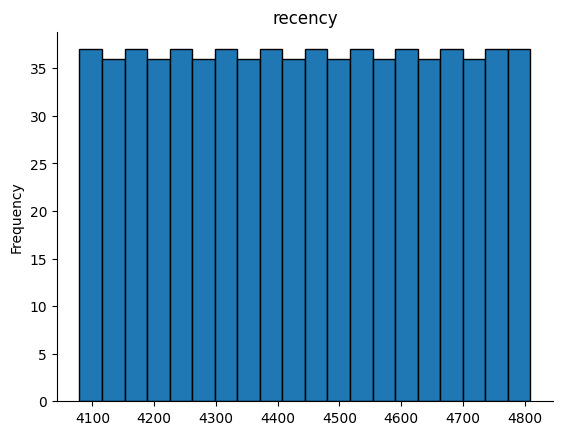

In [ ]:
rfm_combined['recency'].plot(kind='hist', bins=20, title='recency', edgecolor='black')
plt.gca().spines[['top', 'right',]].set_visible(False)

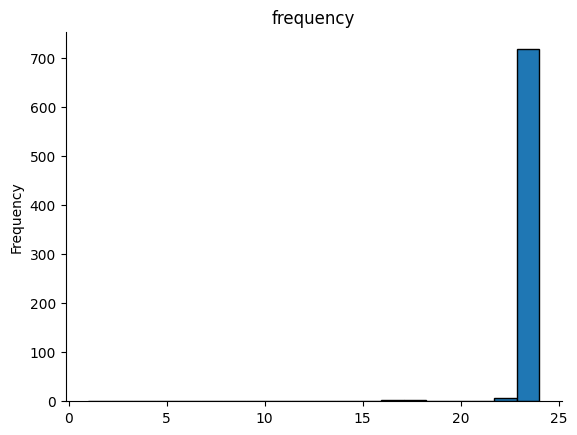

In [ ]:
rfm_combined['frequency'].plot(kind='hist', bins=20, title='frequency', edgecolor='black')
plt.gca().spines[['top', 'right',]].set_visible(False)

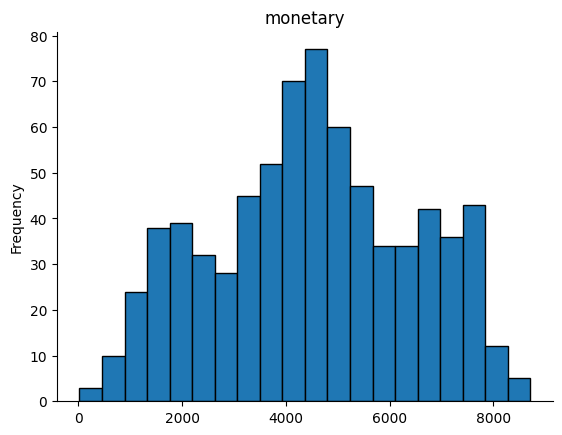

In [ ]:
rfm_combined['monetary'].plot(kind='hist', bins=20, title='monetary', edgecolor='black')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Conclusion

- Conclution pertanyaan 1

Kapan hari penyewaan sepeda tertinggi dan terendah ?

Tingkat penyewaan sepeda tertinggi terdapat di hari jumat yaitu sebanyak 487790 tetapi tren peningkatan sudah dimulai dari hari kamis dengan peringkat kedua yaitu sebanyak 485395 dengan puncak hari Jumat sehingga perlu persediaan unit yang lebih banyak di hari kamis-jumat

- Conclution pertanyaan 2

Berapa perbandingan registered user dengan casual user ?

Perbandingan antara penyewa yang sudah terdaftar dan penyewa biasa cukup jauh dimana sudah 81,17% penyewa sudah terdaftar dengan jumlah sebanyak 2.672.662 dalam total data sementara 620.017 penyewa belum terdaftar dengan persentase sebesar 18,83% sehingga perlu peningkatan promosi dan manfaat dari menjadi penyewa pendaftar sehingga semakin banyak penyewa yang pendaftar akan semakin banyak pelanggan yang setia kepada perusahaan

- Conclution pertanyaan 3

Bagaimana hubungan tingkat kelembapan udara dapat mempengaruhi tingkat penyewaan sepeda?

Berdasarkan hasil analisis dan visualisasi data dapat dilihat tingkat penyewaan paling tinggi berada di tiga rentang, yaitu 40%-50%, 50%-60%, 60%-70% dimana tingkat kelembapan yang baik berada di rentang 45%-65% sehingga tingkat kelembapan yang baik akan mendorong untuk melakukan penyewaan sepeda dimana perusahaan juga dapat ikut andil menjaga tingkat kelembapan di sekitarnya seperti penerapan kebijakan yang berdampak pada lingkungan

In [ ]:
all_data.to_csv("all_data.csv", index=False)